In [21]:
import matplotlib.pylab as plt
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
# load file
import numpy as np
# f = np.load("./model_maxtime_combine_jobs_DSNB_sk_data/predict_0.npz", allow_pickle=True)
f = np.load("/afs/ihep.ac.cn/users/l/luoxj/sk_psd/model_maxtime_time_jobs_DSNB_sk_data/predict_0.npz", allow_pickle=True)
print(f"key: {f.files}")
predict_proba = f["predict_proba"][:,1]
equen = f["equen"]
vertex = f["vertex"]
labels = f["labels"]
pdgs = f["pdg_bkg"]
# print("predict_proba: ", predict_proba)
# print("labels: ", labels)
# print("pdg:  ", pdgs)

key: ['predict_proba', 'equen', 'vertex', 'labels', 'pdg_bkg', 'bkg_px', 'bkg_py', 'bkg_pz', 'bkg_x_init', 'bkg_y_init', 'bkg_z_init', 'bkg_x_nosmear', 'bkg_y_nosmear', 'bkg_z_nosmear']


In [22]:
# seperate sig and bkg
dir_proba ={}
dir_vertex = {}
dir_equen = {}
dir_proba["sig"] = predict_proba[labels==1]
dir_proba["bkg"] = predict_proba[labels==0]
dir_vertex["sig"] = vertex[labels==1]
dir_vertex["bkg"] = vertex[labels==0]
dir_equen["sig"] = equen[labels==1]
dir_equen["bkg"] = equen[labels==0]

# print("Check bkg length: ")
# print("proba->  ", len(dir_proba["bkg"]))
# print("pdg-> ", len(pdgs))
# print("vertex-> ", len(dir_vertex["bkg"]))

In [23]:
# Study pdgs
from collections import Counter
def GetNucleiNum(pdg_evt):
    n_nuclei = 0
    counter = Counter(pdg_evt)
    for key in counter:
        if key > 1000000000:
            n_nuclei += counter[key]
    return n_nuclei
def PdgToN(Nuclei_pdg):
    N = int(Nuclei_pdg/10)%1000
    Z = int(Nuclei_pdg/10000)%1000
    return (N, Z)
v_pdg_multi_nuclei = []
v_proba_multi_nuclei = []
v_pdgs_one_nuclei = []
v_neutron_num = []
v_nuclei_num = []
for i, pdg_evt in enumerate(pdgs):
    n_nuclei = GetNucleiNum(pdg_evt)
    v_neutron_num.append(len(pdg_evt[pdg_evt==2112]))
    v_nuclei_num.append(GetNucleiNum(pdg_evt))
print("neutron num:\t", v_neutron_num)
print("nuclei num:\t", v_nuclei_num)

neutron num:	 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

Text(0, 0.5, 'N')

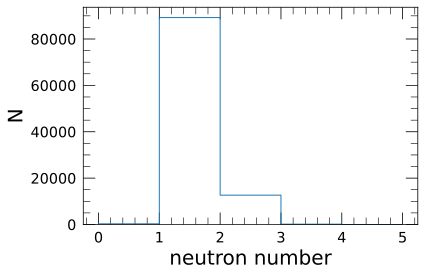

In [24]:
h = plt.hist(v_neutron_num, histtype="step", bins=range(0,6))
plt.xlabel("neutron number")
plt.ylabel("N")

In [25]:
import pandas as pd
pd.DataFrame(np.array([ h[1][:-1],h[0]], dtype=np.int) ,index=["Neutron Number", "Events Number"])

,0,1,2,3,4
Neutron Number,0,1,2,3,4
Events Number,286,89229,12656,139,1


[2.79539834e-03 8.72134961e-01 1.23701264e-01 1.35860269e-03
 9.77412008e-06]


Text(0, 0.5, 'ratio')

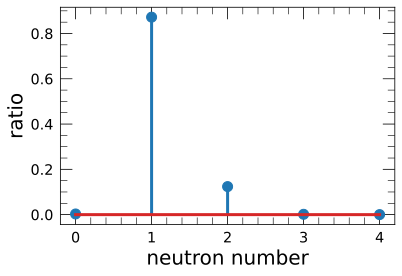

In [26]:
ratio_neutron_num = h[0]/np.sum(h[0])
print(ratio_neutron_num)
plt.stem(ratio_neutron_num)
plt.xlabel("neutron number")
plt.ylabel("ratio")



Text(0.5, 0, '$R^3$')

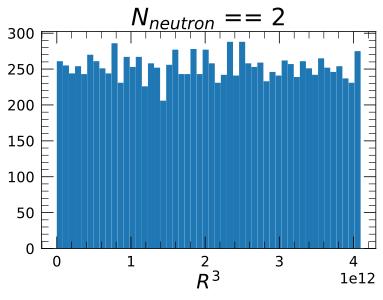

In [27]:
v_neutron_num = np.array((v_neutron_num))
v_R3_2n = []
for i_vertex in vertex[labels==0][v_neutron_num==2]:
    v_R3_2n.append(np.sum(i_vertex**2)**(3/2))

plt.hist(v_R3_2n, bins=50)
plt.title("$N_{neutron}$ == 2")
plt.xlabel("$R^3$")

Text(0.5, 0, '$R^3$')

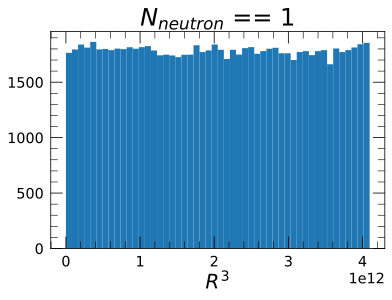

In [28]:

v_neutron_num = np.array((v_neutron_num))
v_R3_1n = []
#for i_vertex in vertex[labels==0][v_neutron_num==1]:
for i_vertex in vertex[labels==0][v_neutron_num==1]:
    v_R3_1n.append(np.sum(i_vertex**2)**(3/2))

plt.hist(v_R3_1n, bins=50)
plt.title("$N_{neutron}$ == 1")
plt.xlabel("$R^3$")

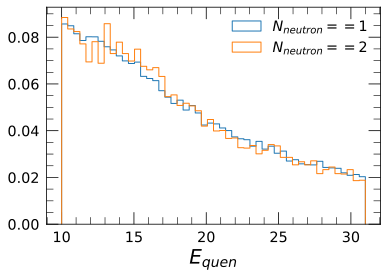

In [29]:
plt.hist(dir_equen["bkg"][v_neutron_num==1], bins=50, histtype="step", label="$N_{neutron}==1$",density=True)
plt.hist(dir_equen["bkg"][v_neutron_num==2], bins=50, histtype="step", label="$N_{neutron}==2$", density=True)
plt.xlabel("$E_{quen}$")
plt.legend()

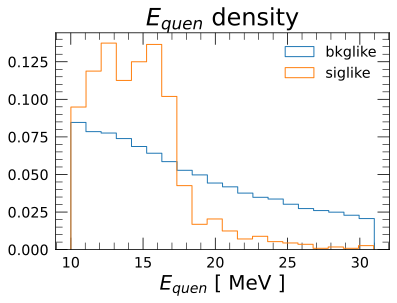

In [30]:
critera = 0.945999999999995
equen_bkg = equen[labels==0]
equen_bkg_siglike = equen_bkg[dir_proba["bkg"]>critera]
equen_bkg_bkglike = equen_bkg[dir_proba["bkg"]<=critera]
plt.hist(equen_bkg_bkglike, histtype="step", label="bkglike", density=True, bins=20)
plt.hist(equen_bkg_siglike, histtype="step", label="siglike", density=True, bins=20)
plt.title("$E_{quen}$ density")
plt.xlabel("$E_{quen}$ [ MeV ]")
plt.legend()